In [1]:
import pandas as pd
df = pd.read_csv('segment.csv')

In [2]:
# Display basic statistics of numerical columns
print("Basic statistical summary:")
print(df.describe())

# Count the distribution of classes
print("\nClass distribution:")
print(df['class'].value_counts())

# Check for any missing values
print("\nMissing values:")
print(df.isnull().sum())

# Show correlations between numerical features
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print("\nHighly correlated features (>0.8 or <-0.8):")
high_corr = correlation_matrix[abs(correlation_matrix) > 0.8]
print(high_corr[high_corr != 1.0].dropna(how='all').dropna(axis=1, how='all'))

Basic statistical summary:
       region_centroid_col  region_centroid_row  region_pixel_count  \
count          2310.000000          2310.000000              2310.0   
mean            124.913853           123.417316                 9.0   
std              72.956532            57.483851                 0.0   
min               1.000000            11.000000                 9.0   
25%              62.000000            81.000000                 9.0   
50%             121.000000           122.000000                 9.0   
75%             189.000000           172.000000                 9.0   
max             254.000000           251.000000                 9.0   

       short_line_density_5  short_line_density_2   vedge_mean     vegde_sd  \
count           2310.000000           2310.000000  2310.000000  2310.000000   
mean               0.014334              0.004714     1.893940     5.709320   
std                0.040154              0.024234     2.698909    44.846453   
min              

In [3]:
# 1. Import the libraries used in your system.
import pandas as pd  # For data manipulation and loading dataset
import numpy as np  # For numerical operations
import tensorflow as tf  # For building and training deep learning models
from tensorflow.keras.models import Sequential  # To initialize the neural network model
from tensorflow.keras.layers import Dense, Dropout  # For dense and dropout layers
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras import regularizers  # For adding regularization to layers
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
import matplotlib.pyplot as plt  # For plotting the RMSE vs epochs graph

print("Step 1 complete: Libraries imported.")


Step 1 complete: Libraries imported.


In [4]:
# 2. Split the segment.csv dataset (original dataset and description) into 2 parts with 75% training and 25% testing data ratio.

import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split  # For splitting the dataset

# Load the dataset from CSV file
data = pd.read_csv('segment.csv')

# Separate features (X) and target variable (y)
X = data.drop(columns=['class'])  # Drop the 'class' column for features
y = data['class']  # Target variable

# Convert 'class' target to categorical if it's not already
y = pd.get_dummies(y)  # Convert categorical 'class' into one-hot encoding

# Split the dataset into 75% training and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 75% train, 25% test

print("Step 2 complete: Data split into training and testing sets.")


Step 2 complete: Data split into training and testing sets.


In [5]:
# 3. Build your model using the following specifications:
# 4 dense hidden layers using rectified linear unit (ReLU) activation algorithm, which contains 64 nodes.
# 6 dense hidden layers using hyperbolic tangent activation algorithm, which contains 64 nodes.
# 1 dense output layer using softmax activation algorithm, which contains 3 nodes.

import tensorflow as tf  # For building and training the deep learning model
from tensorflow.keras.models import Sequential  # To initialize the neural network model
from tensorflow.keras.layers import Dense  # For adding dense layers

# Initialize the neural network model
model = Sequential()

# Add the first 4 dense hidden layers with ReLU activation and 64 nodes
for _ in range(4):
    model.add(Dense(64, activation='relu'))  # Add a dense layer with 64 nodes and ReLU activation

# Add the next 6 dense hidden layers with Tanh activation and 64 nodes
for _ in range(6):
    model.add(Dense(64, activation='tanh'))  # Add a dense layer with 64 nodes and Tanh activation

# Add the output layer with softmax activation (3 nodes for 3 possible classes)
model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes using softmax activation

print("Step 3 complete: Model built with specified layers.")


Step 3 complete: Model built with specified layers.


In [6]:
# 4. Compile your model using the mean absolute error (MAE) loss function, adaptive moment estimation (ADAM) optimiser with 0.05 learning rate, and root mean squared error (RMSE) performance metric.

from tensorflow.keras.optimizers import Adam  # For the Adam optimizer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.05),  # Adam optimizer with learning rate 0.05
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

print("Step 4 complete: Model compiled with MAE loss, ADAM optimizer, and RMSE metric.")


Step 4 complete: Model compiled with MAE loss, ADAM optimizer, and RMSE metric.


# Final

In [8]:
# 1. Import the libraries used in your system.
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import tensorflow as tf  # For building and training deep learning models
from tensorflow.keras.models import Sequential  # To initialize the neural network model
from tensorflow.keras.layers import Dense  # For adding dense layers
from tensorflow.keras.optimizers import Adam  # For using the Adam optimizer
from tensorflow.keras import regularizers  # For adding regularization to layers
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
import matplotlib.pyplot as plt  # For plotting the RMSE vs epochs graph

# 2. Split the segment.csv dataset (original dataset and description) into 2 parts with 75% training and 25% testing data ratio.
data = pd.read_csv('segment.csv')  # Load the dataset from CSV file

# Separate features (X) and target variable (y)
X = data.drop(columns=['class'])  # Drop the 'class' column for features
y = data['class']  # Target variable

# Convert 'class' target to categorical if it's not already
y = pd.get_dummies(y)  # Convert categorical 'class' into one-hot encoding

# Split the dataset into 75% training and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 75% train, 25% test

print("Step 2 complete: Data split into training and testing sets.")

# 3. Build your model using the following specifications:
# 4 dense hidden layers using rectified linear unit (ReLU) activation algorithm, which contains 64 nodes.
# 6 dense hidden layers using hyperbolic tangent activation algorithm, which contains 64 nodes.
# 1 dense output layer using softmax activation algorithm, which contains 7 nodes (adjusted for 7 classes in the target).
model = Sequential()  # Initialize the neural network model

# Add the first 4 dense hidden layers with ReLU activation and 64 nodes
for _ in range(4):
    model.add(Dense(64, activation='relu'))  # Add a dense layer with 64 nodes and ReLU activation

# Add the next 6 dense hidden layers with Tanh activation and 64 nodes
for _ in range(6):
    model.add(Dense(64, activation='tanh'))  # Add a dense layer with 64 nodes and Tanh activation

# Modify the output layer to have 7 nodes, as there are 7 classes in the target variable
model.add(Dense(7, activation='softmax'))  # Output layer with 7 nodes using softmax activation

print("Step 3 complete: Model built with 7 output nodes.")

# 4. Compile your model using the mean absolute error (MAE) loss function, adaptive moment estimation (ADAM) optimiser with 0.05 learning rate, and root mean squared error (RMSE) performance metric.
model.compile(optimizer=Adam(learning_rate=0.05),  # Adam optimizer with learning rate 0.05
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

print("Step 4 complete: Model compiled with MAE loss, ADAM optimizer, and RMSE metric.")

# 5. Train your model to fit the training data for 300 epochs.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)  # Early stopping if validation loss does not improve

history = model.fit(X_train, y_train,  # Training data (features and target)
                    epochs=300,  # Train for 300 epochs
                    batch_size=int(0.1 * len(X_train)),  # Use 10% of the training data size as batch size
                    validation_split=0.1,  # Use 10% of the training data for validation
                    callbacks=[early_stopping])  # Early stopping callback to stop training if no improvement

print("Step 5 complete: Model trained for 300 epochs.")


Step 2 complete: Data split into training and testing sets.
Step 3 complete: Model built with 7 output nodes.
Step 4 complete: Model compiled with MAE loss, ADAM optimizer, and RMSE metric.
Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2466 - root_mean_squared_error: 0.4244 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2422 - root_mean_squared_error: 0.4921 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2420 - root_mean_squared_error: 0.4919 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2429 - root_mean_squared_error: 0.4928 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2406 - root_mean_squared_error: 0.4905 - val_loss: 0.2496 - val_root_mean_squared_error: 0.4996
Epoch 6/300
10/10 ━━━━━━

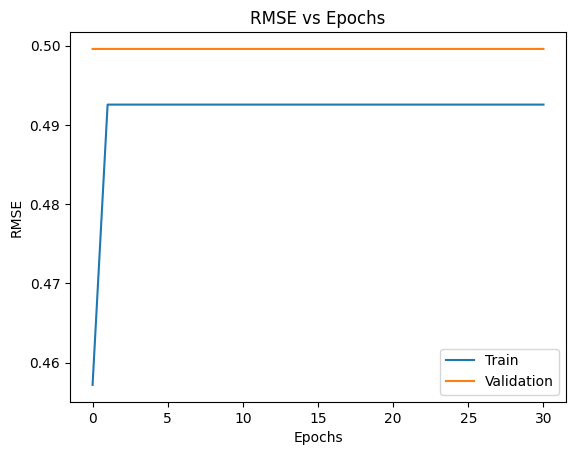

Step 6 complete: RMSE vs Epochs graph plotted.


In [9]:
# 6. Plot the root mean squared error (RMSE) vs. epochs graph.

import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Plot the RMSE for both training and validation data
plt.plot(history.history['root_mean_squared_error'])  # RMSE for training data
plt.plot(history.history['val_root_mean_squared_error'])  # RMSE for validation data
plt.title('RMSE vs Epochs')  # Title of the graph
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('RMSE')  # Y-axis label
plt.legend(['Train', 'Validation'])  # Legends for the train and validation curves
plt.show()  # Display the plot

print("Step 6 complete: RMSE vs Epochs graph plotted.")


In [10]:
# 7. Reduce the overfitting by introducing the regularisations with the following specifications:
# 1 dropout layer after the first 2 layers with 0.15 dropout rate.
# 1 dropout layer after the first 7 layers with 0.10 dropout rate.

# Rebuild the model with the dropout layers as specified
model = Sequential()  # Initialize the neural network model

# Add the first 4 dense hidden layers with ReLU activation and 64 nodes
for _ in range(4):
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.010)))  # Add a dense layer with ReLU

# Add the first dropout layer after the first 2 layers with 0.15 dropout rate
model.add(Dropout(0.15))  # Dropout to prevent overfitting (after 2 layers)

# Add the next 6 dense hidden layers with Tanh activation and 64 nodes
for _ in range(6):
    model.add(Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.010)))  # Add a dense layer with Tanh

# Add the second dropout layer after the first 7 layers with 0.10 dropout rate
model.add(Dropout(0.10))  # Dropout after 7 layers to prevent overfitting

# Modify the output layer to have 7 nodes, as there are 7 classes in the target variable
model.add(Dense(7, activation='softmax'))  # Output layer with 7 nodes using softmax activation

print("Step 7 complete: Dropout layers added to reduce overfitting.")


Step 7 complete: Dropout layers added to reduce overfitting.


In [11]:
# 8. Introduce the L2 regularisation with 0.010 weight decay to the hidden dense layers.

# Rebuild the model with L2 regularization for hidden layers
model = Sequential()  # Initialize the neural network model

# Add the first 4 dense hidden layers with ReLU activation, 64 nodes, and L2 regularization
for _ in range(4):
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.010)))  # Add a dense layer with L2 regularization

# Add the first dropout layer after the first 2 layers with 0.15 dropout rate
model.add(Dropout(0.15))  # Dropout to prevent overfitting (after 2 layers)

# Add the next 6 dense hidden layers with Tanh activation, 64 nodes, and L2 regularization
for _ in range(6):
    model.add(Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.010)))  # Add a dense layer with L2 regularization

# Add the second dropout layer after the first 7 layers with 0.10 dropout rate
model.add(Dropout(0.10))  # Dropout after 7 layers to prevent overfitting

# Modify the output layer to have 7 nodes, as there are 7 classes in the target variable
model.add(Dense(7, activation='softmax'))  # Output layer with 7 nodes using softmax activation

print("Step 8 complete: L2 regularization with 0.010 weight decay added to hidden dense layers.")


Step 8 complete: L2 regularization with 0.010 weight decay added to hidden dense layers.


In [12]:
# 9. Recompile and retrain your model with the following specifications:
# Allocate 10% training data for validation data.
# Use the batch size of 10% from the remaining training data.
# Introduce early stopping based on the validation loss with patience of 30.

# Recompile the model with the same configurations
model.compile(optimizer=Adam(learning_rate=0.05),  # Adam optimizer with learning rate 0.05
              loss='mae',  # Mean Absolute Error loss function
              metrics=[tf.keras.metrics.RootMeanSquaredError()])  # RMSE as the performance metric

# Define the early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)  # Early stopping with patience of 30

# Train the model with the specified batch size and validation split
history = model.fit(X_train, y_train,  # Training data (features and target)
                    epochs=300,  # Train for 300 epochs
                    batch_size=int(0.1 * len(X_train)),  # Use 10% of the training data size as batch size
                    validation_split=0.1,  # Allocate 10% of the training data for validation data
                    callbacks=[early_stopping])  # Early stopping callback

print("Step 9 complete: Model recompiled and retrained with early stopping.")


Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.8924 - root_mean_squared_error: 0.3647 - val_loss: 1.0402 - val_root_mean_squared_error: 0.4803
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7437 - root_mean_squared_error: 0.4846 - val_loss: 0.5282 - val_root_mean_squared_error: 0.4976
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4426 - root_mean_squared_error: 0.4890 - val_loss: 0.3379 - val_root_mean_squared_error: 0.4994
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3151 - root_mean_squared_error: 0.4936 - val_loss: 0.2785 - val_root_mean_squared_error: 0.4995
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2663 - root_mean_squared_error: 0.4914 - val_loss: 0.2598 - val_root_mean_squared_error: 0.4995
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2499 - root_mean_squared_error: 0.4910 - val_loss: 0.2533 - val_root_mean_squared_error: 0.4996
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

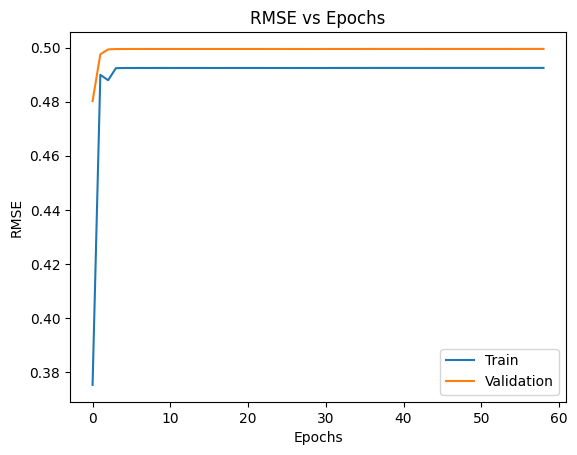

Step 10 complete: RMSE vs Epochs graph re-plotted.


In [13]:
# 10. Replot the root mean squared error (RMSE) vs. epochs graph.

import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Plot the RMSE for both training and validation data
plt.plot(history.history['root_mean_squared_error'])  # RMSE for training data
plt.plot(history.history['val_root_mean_squared_error'])  # RMSE for validation data
plt.title('RMSE vs Epochs')  # Title of the graph
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('RMSE')  # Y-axis label
plt.legend(['Train', 'Validation'])  # Legends for the train and validation curves
plt.show()  # Display the plot

print("Step 10 complete: RMSE vs Epochs graph re-plotted.")
